This project was based on an Analytis Vidhya prompt, which narrows the scope of hate speech to racist and sexist language.  

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
from scipy import sparse

from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train  = pd.read_csv('csv_and_npz_files/train_E6oV3lV.csv') 
test = pd.read_csv('csv_and_npz_files/test_tweets_anuFYb8.csv')

bow = sparse.load_npz("csv_and_npz_files/bow.npz")
tfidf = sparse.load_npz("csv_and_npz_files/tfidf.npz")
wordvec_df = pd.read_csv('csv_and_npz_files/wordvec_df.csv')
docvec_df = pd.read_csv('csv_and_npz_files/docvec_df.csv')

In [3]:
# Extract train and test data for bow, tfidf, word2vec, and doc2vec

train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],                                                            random_state=42,                                                           test_size=0.3)

train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]


# Machine Learning Using LogReg

# LogReg on Bag of Words

In [89]:

lreg = LogisticRegression() 

# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.2 # if prediction is greater than or equal to 0.2 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5431218816821097

# LogReg on TF-IDF

In [90]:
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.21
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5570776255707763

# LogReg on Word2Vec

In [103]:
lreg.fit(xtrain_w2v, ytrain) 

prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.45
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)



C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.531895777178796

# LogReg on Doc2Vec

In [95]:
lreg.fit(xtrain_d2v, ytrain) 

prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.2833333333333333

# Support Vector Machine

# SVM on Bag of Words

In [39]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 

prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int)

0.5097674418604652

# SVM on TF-IDF

In [41]:
svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5109489051094891

# SVM on Word2Vec

In [42]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5706851691240243

# SVM on Doc2Vec

In [43]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.22197558268590456

# ML Using Random Forest

# Random Forest on Bag of Words

In [10]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 
f1_score(yvalid, prediction)


0.5529225908372828

In [46]:
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_bow.csv', index=False)


# Random Forest on TF-IDF

In [47]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.562152133580705

# Random Forest on Word2Vec

In [48]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)


0.4923747276688453

# Random Forest on Doc2Vec

In [49]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.05397727272727272

# ML with LightGBM

In [4]:
X_train = xtrain_w2v.astype('float32')
y_train = ytrain.astype('float32')
X_test = xvalid_w2v.astype('float32')
y_test = yvalid.astype('float32')

# LightGBM on Bag of Words

In [4]:
X_train = xtrain_bow.astype('float32')
y_train = ytrain.astype('float32')
X_test = xvalid_bow.astype('float32')
y_test = yvalid.astype('float32')

lgb_classifier = lgbm.LGBMClassifier(random_state = 47).fit(X_train, y_train) 

prediction = lgb_classifier.predict(X_test)
f1_score(y_test, prediction)



0.5044160942100099

# Light GBM on TF-IDF

In [5]:
X_train = xtrain_tfidf.astype('float32')
y_train = ytrain.astype('float32')
X_test = xvalid_tfidf.astype('float32')
y_test = yvalid.astype('float32')

lgb_classifier = lgbm.LGBMClassifier(random_state = 47).fit(X_train, y_train) 

prediction = lgb_classifier.predict(X_test)
f1_score(y_test, prediction)



0.5211538461538461

# Light GBM on Word2Vec

In [73]:
X_train = xtrain_w2v.astype('float32')
y_train = ytrain.astype('float32')
X_test = xvalid_w2v.astype('float32')
y_test = yvalid.astype('float32')

lgb_classifier = lgbm.LGBMClassifier(random_state = 47).fit(X_train, y_train) 

prediction = lgb_classifier.predict(X_test)
f1_score(y_test, prediction)


0.6028880866425992

## Remarks:

This Light GBM model is the best performing of the untuned models with an F1 score of .603


# Light GBM on Doc2Vec

In [72]:
X_train = xtrain_d2v.astype('float32')
y_train = ytrain.astype('float32')
X_test = xvalid_d2v.astype('float32')
y_test = yvalid.astype('float32')

lgb_classifier = lgbm.LGBMClassifier(random_state = 47).fit(X_train, y_train) 

prediction = lgb_classifier.predict(X_test)
f1_score(y_test, prediction)


0.2585812356979405

# Tuning Parameters for promising Algorithms

In [ ]:
#Support Vector Classifier on Word2Vec

#svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
#prediction = svc.predict_proba(xvalid_w2v) 
#prediction_int = prediction[:,1] >= 0.3 
#prediction_int = prediction_int.astype(np.int) 
#f1_score(yvalid, prediction_int)

In [14]:
#def svc_param_selection(X, y, nfolds):
#    Cs = [0.01, 0.1, 1, 10]
#    gammas = [0.001, 0.01, 0.1]
#    param_grid = {'C': Cs, 'gamma' : gammas}
#    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
#    grid_search.fit(X, y)
#    grid_search.best_params_
#    return grid_search.best_params_

In [19]:
#svc_param_selection(xtrain_w2v, ytrain, 5)

{'C': 10, 'gamma': 0.001}

In [ ]:
#svc = svm.SVC(kernel='linear', C=10, gamma = 0.001, probability=True).fit(xtrain_w2v, ytrain) 
#prediction = svc.predict_proba(xvalid_w2v) 
#prediction_int = prediction[:,1] >= 0.3 
#prediction_int = prediction_int.astype(np.int) 
#f1_score(yvalid, prediction_int)

#Note it is not recommended that this model be used in this particular application on a single machine, due to time constraints.

In [4]:
# Log Reg Tuning on Word2Vec

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression(random_state = 47)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(xtrain_w2v, ytrain)

#Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.9462298305993831


In [104]:
lreg = LogisticRegression(C = 0.006105402296585327, random_state = 47).fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.45
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int) # calculating f1 score for the validation set



C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.533213644524237

# Random Forest on Word2Vec

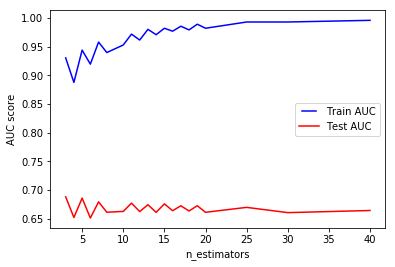

In [32]:
n_estimators = [3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 40]
train_results = []
test_results = []

for estimator in n_estimators:
    rfc = RandomForestClassifier(n_estimators=estimator, random_state=11)
    rfc.fit(xtrain_w2v, ytrain)
    train_pred = rfc.predict(xtrain_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rfc.predict(xvalid_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yvalid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()




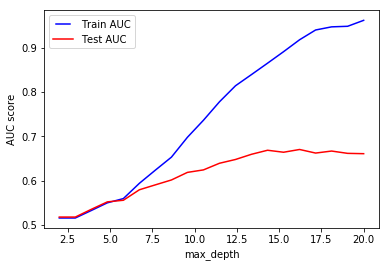

In [33]:
max_depths = np.linspace(2, 20, 20, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth, n_estimators = 12, random_state=11)
    rfc.fit(xtrain_w2v, ytrain)
    train_pred = rfc.predict(xtrain_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rfc.predict(xvalid_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yvalid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, color = 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, color = 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()


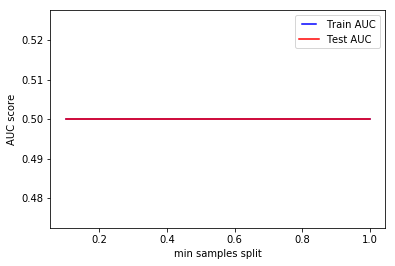

In [34]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    rfc = RandomForestClassifier(max_depth=6, n_estimators = 12, min_samples_split = min_samples_split, n_jobs=-1, random_state=11)
    rfc.fit(xtrain_w2v, ytrain)
    train_pred = rfc.predict(xtrain_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rfc.predict(xvalid_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yvalid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()


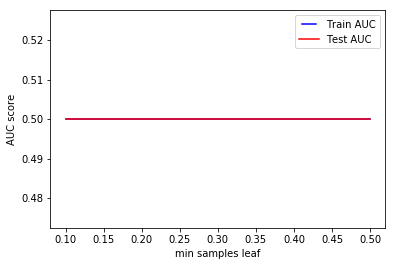

In [36]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rfc = RandomForestClassifier(max_depth=6, n_estimators = 12, 
                                 min_samples_leaf = min_samples_leaf, random_state=11)
    rfc.fit(xtrain_w2v, ytrain)
    train_pred = rfc.predict(xtrain_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rfc.predict(xvalid_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yvalid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

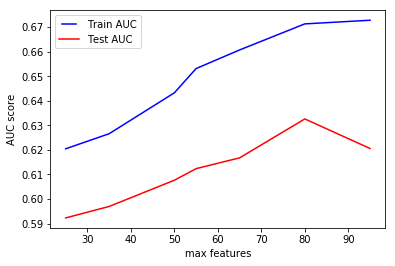

In [39]:
max_features = [25, 35,  50, 55, 65, 80, 95]
train_results = []
test_results = []
for max_feature in max_features:
    rfc = RandomForestClassifier(max_depth=6, n_estimators = 12, 
                                 max_features = max_feature, random_state=11)
    rfc.fit(xtrain_w2v, ytrain)
    train_pred = rfc.predict(xtrain_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rfc.predict(xvalid_w2v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yvalid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [40]:
rfc = RandomForestClassifier(max_depth=6, n_estimators = 12, max_features = 80).fit(xtrain_w2v, ytrain)
prediction = rfc.predict(xvalid_w2v) 
rfc_prediction = prediction

f1_score(yvalid, prediction)

0.36406067677946324

In [ ]:
pred

# Light GBM on Word2Vec

In [32]:
# Create classifier to use.

X_train = xtrain_w2v.astype('float32')
y_train = ytrain.astype('float32')
X_test = xvalid_w2v.astype('float32')
y_test = yvalid.astype('float32')

model = lgbm.LGBMClassifier(objective = 'binary', random_state = 47)



In [33]:
dtrain = X_train
X_train['target'] = y_train
dtrain = dtrain.drop('Unnamed: 0', axis = 1)
X_train = X_train.drop("Unnamed: 0", axis = 1)

In [107]:
def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9956
AUC Score (Train): 0.999634
CV Score : Mean - 0.9444026 | Std - 0.005451965 | Min - 0.9343049 | Max - 0.9499294


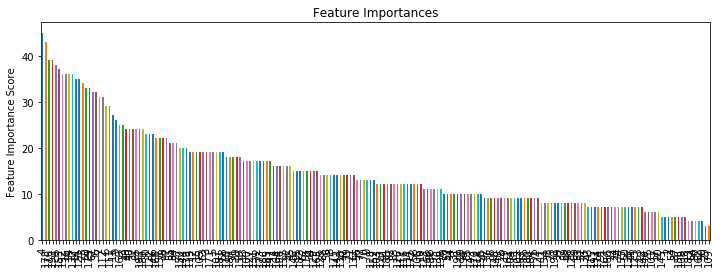

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


target = 'target'

predictors = [x for x in dtrain.columns if x not in [target]]
lgbm0 = lgbm.LGBMClassifier(objective = 'binary', random_state = 47)
modelfit(lgbm0, dtrain, predictors, target)



In [106]:
param_test1 = {'num_leaves':np.arange(10, 250, 10), 'max_depth':np.arange(4, 8, 1)}
gsearch1 = GridSearchCV(estimator = lgbm.LGBMClassifier(objective = 'binary', random_state = 47), 
                        param_grid = param_test1, cv=5, return_train_score=True)
gsearch1.fit(dtrain[predictors],dtrain[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_   

({'mean_fit_time': array([1.37364564, 1.52279506, 1.51910329, 1.54198155, 1.52450604,
         1.55885878, 1.53943629, 1.56691933, 1.56634955, 1.55471849,
         1.56748619, 1.56585178, 1.5853055 , 1.72365232, 1.7187252 ,
         1.70552359, 1.6976861 , 1.72717476, 1.71473804, 1.71788349,
         1.74133272, 1.73478169, 1.73133388, 1.75690784, 1.63718014,
         2.10264792, 2.2959341 , 2.31377692, 2.29049969, 2.33319297,
         2.34508753, 2.35010452, 2.34930205, 2.32668786, 2.36380401,
         2.34113998, 2.45849113, 2.3780756 , 2.3621048 , 2.3737659 ,
         2.39115524, 2.39014778, 2.39407825, 2.41636481, 2.41392593,
         2.39640436, 2.4317811 , 2.42012792, 1.69621725, 2.34143176,
         2.77401795, 3.13979034, 3.31500373, 3.35050206, 3.35494761,
         3.35999732, 3.37474699, 3.38727303, 3.47460332, 3.55395675,
         3.37205057, 3.39384756, 3.98959999, 3.56836925, 3.4996758 ,
         3.48538952, 3.58779626, 3.52573295, 3.67977695, 3.7549366 ,
         3.520000


Model Report
Accuracy : 0.9993
AUC Score (Train): 0.999880
CV Score : Mean - 0.9455291 | Std - 0.004546526 | Min - 0.939432 | Max - 0.9526395


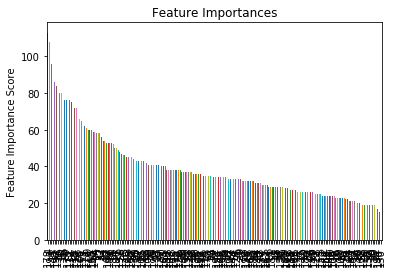

In [107]:

lgbm1 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 7, num_leaves = 90, random_state = 47)
modelfit(lgbm1, dtrain, predictors, target)

In [114]:
param_test2 = {'min_data_in_leaf':np.arange(100, 1000, 50)}
gsearch2 = GridSearchCV(estimator = lgbm.LGBMClassifier(objective = 'binary', random_state = 47, 
                                                        max_depth = 7, num_leaves = 90,), 
                        param_grid = param_test2, cv=5, return_train_score=True)

gsearch2.fit(dtrain[predictors], dtrain[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_   

({'mean_fit_time': array([3.30246301, 2.89759803, 2.5229465 , 2.23731098, 2.11498189,
         2.01863704, 1.95627294, 1.88871202, 1.73240237, 1.72960358,
         1.76518226, 1.70964136, 1.74424419, 1.7129045 , 1.66504464,
         1.5926816 , 1.58643522, 1.56971025]),
  'std_fit_time': array([0.4063502 , 0.16770222, 0.08831567, 0.04981723, 0.08900188,
         0.01551344, 0.06415162, 0.05883329, 0.03163391, 0.06893754,
         0.07026434, 0.09515858, 0.07809867, 0.10883221, 0.05587292,
         0.03194329, 0.03720149, 0.01844114]),
  'mean_score_time': array([0.089149  , 0.09154687, 0.09454584, 0.08794918, 0.08635015,
         0.08515091, 0.09054809, 0.08475103, 0.09514484, 0.08515105,
         0.09454522, 0.08834896, 0.08994765, 0.08714967, 0.08694992,
         0.08695006, 0.08734956, 0.08655019]),
  'std_score_time': array([0.00354169, 0.00978416, 0.01569558, 0.00551053, 0.00286866,
         0.00213408, 0.01269892, 0.00097931, 0.0218998 , 0.00193796,
         0.01410013, 0.0034964


Model Report
Accuracy : 0.9792
AUC Score (Train): 0.995326
CV Score : Mean - 0.9456335 | Std - 0.004136577 | Min - 0.9374887 | Max - 0.9488705


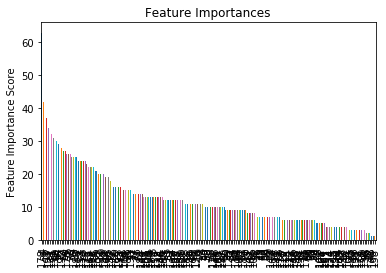

In [115]:
lgbm2 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 7, num_leaves = 90, min_data_in_leaf = 400, random_state = 47)
modelfit(lgbm2, dtrain, predictors, target)

In [119]:
X_train = X_train.drop('Unnamed: 0', axis = 1)

model2 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 7, num_leaves = 90, min_data_in_leaf = 400, random_state = 47)
model2.fit(X_train, y_train)


prediction = model2.predict(X_test) 
f1_score(y_test, prediction)

0.6218951241950322

In [120]:
param_test3 = {'max_bin':np.arange(200, 1000, 100)}
gsearch3 = GridSearchCV(estimator = lgbm.LGBMClassifier(objective = 'binary', random_state = 47, 
                                                        max_depth = 7, num_leaves = 90,), 
                        param_grid = param_test3, cv=5, return_train_score=True)

gsearch3.fit(dtrain[predictors], dtrain[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([ 4.14711289,  5.42478609,  6.84293957,  9.19010057, 10.06304436,
         11.4716054 , 12.7184195 , 14.11583362]),
  'std_fit_time': array([0.08831515, 0.09324891, 0.24484011, 0.87154993, 0.30853604,
         0.2526987 , 0.31953482, 0.33964638]),
  'mean_score_time': array([0.09349461, 0.07743044, 0.07423472, 0.1130043 , 0.09194703,
         0.09154744, 0.09334617, 0.09814339]),
  'std_score_time': array([0.00159565, 0.01365291, 0.01442903, 0.01701695, 0.00199881,
         0.00205777, 0.0063711 , 0.01194918]),
  'param_max_bin': masked_array(data=[200, 300, 400, 500, 600, 700, 800, 900],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_bin': 200},
   {'max_bin': 300},
   {'max_bin': 400},
   {'max_bin': 500},
   {'max_bin': 600},
   {'max_bin': 700},
   {'max_bin': 800},
   {'max_bin': 900}],
  'split0_test_score': array([0.95664804, 0.95932961, 0.9575419 , 0.

In [121]:
param_test4 = {'learning_rate':np.arange(0.001, 0.101, .01), 'num_iterations': np.arange(100, 1000, 100)}
gsearch4 = GridSearchCV(estimator = lgbm.LGBMClassifier(objective = 'binary', random_state = 47, 
                                                        max_depth = 7, num_leaves = 90, max_bin = 400), 
                        param_grid = param_test4, cv=5, return_train_score=True)

gsearch4.fit(dtrain[predictors], dtrain[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site

({'mean_fit_time': array([  6.26225371,  12.75965443,  18.97222199,  25.53260884,
          32.01666617,  38.5884706 ,  46.91369352,  53.62648487,
          59.63654652,   7.13828788,  14.29536505,  21.12814178,
          26.96458316,  33.59596882,  39.56880608,  47.85546679,
          54.39475217,  60.65853209,   8.36061897,  13.83679309,
          19.56241441,  25.20044999,  31.10953698,  37.44935651,
          43.95104494,  50.0845428 ,  55.98827724,   7.31053829,
          13.33576698,  19.04065723,  24.97357225,  31.44873133,
          37.80825224,  43.89914947,  49.44804935,  54.9278955 ,
           7.13731818,  12.94215312,  19.04496002,  25.23971558,
          31.4345304 ,  37.4705236 , 112.0680491 ,  58.90889797,
         105.00218325,  13.96650481,  25.05381393,  39.58848233,
          53.72652397,  64.70391579,  79.79627819,  82.97646503,
          85.14464197, 103.26175585,  15.18610225,  27.82627106,
          40.63532434,  51.72616558,  65.28297496,  75.61690764,
        

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site


Model Report
Accuracy : 0.9996
AUC Score (Train): 0.999996
CV Score : Mean - 0.9460198 | Std - 0.005262457 | Min - 0.9376022 | Max - 0.9513499


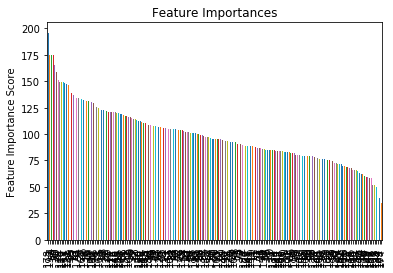

In [122]:
model3 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 7, num_leaves = 90, 
                             min_data_in_leaf = 400, random_state = 47, max_bin = 400,
                            learning_rate = 0.091, num_iterations = 900)
modelfit(model3, dtrain, predictors, target)

In [5]:
model3 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 7, num_leaves = 90, 
                             min_data_in_leaf = 400, random_state = 47, max_bin = 400,
                            learning_rate = 0.091, num_iterations = 900).fit(X_train, y_train)

prediction = model3.predict(X_test)
f1_score(y_test, prediction)

C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.6340579710144928

## Remark:
This tuning improves on the previous F1 score under train/test/split... from .603 to .634

When this classifier was used to submit predictions in the Analytics Vidhya Competition, it was 64.7% accurate, so the CV tuning on the train/test/split seems to be an effective approach with this data set.

# Stacking Exercise

In [319]:
# Assemble a dataframe to use the results from word2vec features and introduce randomly generated folds
import random

# Stacking function accepts feature df and validation array "train".  
# NOTE THAT Algorithms need to be defined within the function for each project.
# NOTE ALSO that all the domain df must be clean of extraneous features.

# Finally, note that while this cell is attempting to define a function for stacking, it is not nearly robust enough yet.
# That is, details about the models being used had to be written into the body of the function instead of being passed in as
# arguments.

def stacking(df, train):

    stacked_df = df.copy()
    fold_ids = [1, 2, 3, 4, 5]
    FoldID = []

    for i in np.arange(stacked_df.shape[0]):
        fold = random.choice(fold_ids)   
        FoldID.append(fold)
        
    stacked_df['FoldID'] = FoldID
    stacked_df['Classes'] = train.loc[:, 'label']

    # Create a train_meta and test_meta dataframe with blank columns for the predictions

    train_meta = stacked_df.copy()
    train_meta['Model_1'] = np.nan
    train_meta['Model_2'] = np.nan
    train_meta['Model_3'] = np.nan
    test_meta = train_meta.copy()

    # Script the train/test split by fold ID, fit the classifier, and store the predictions

    fully_stacked = pd.DataFrame()

    for i in fold_ids:
        current_train = train_meta[train_meta['FoldID']!=i]
        current_test = train_meta[train_meta['FoldID']==i]
        clean_train = current_train.drop(['FoldID', 'Model_1', 'Model_2', 'Model_3'], axis = 1)
        clean_test = current_test.drop(['FoldID', 'Model_1', 'Model_2', 'Model_3'], axis = 1)

        # Train Model 1
        lreg = LogisticRegression(C = 0.006105402296585327, random_state = 47).fit(clean_train.drop('Classes', axis = 1), 
                                                                               current_train['Classes'].values)
        prediction = lreg.predict_proba(clean_test.drop('Classes', axis = 1)) 
        logreg_predict = prediction[:,1] >= 0.45
        current_test['Model_1']  = logreg_predict.astype(np.int) 

        # Train Model 2
        X_train = clean_train.drop('Classes', axis = 1).astype('float32')
        y_train = current_train['Classes'].values.astype('float32')
        X_test = clean_test.drop('Classes', axis = 1).astype('float32')
        lightgbm_model = lgbm.LGBMClassifier(objective = 'binary', max_depth = 7, num_leaves = 90, 
                                     min_data_in_leaf = 400, random_state = 47, max_bin = 400,
                                    learning_rate = 0.091, num_iterations = 900).fit(X_train, y_train)
        current_test['Model_2'] = lightgbm_model.predict(X_test)
        
        
        # Train Model 3
        svc = svm.SVC(kernel='linear', C=1, probability=True).fit(clean_train.drop('Classes', axis = 1), 
                                                                               current_train['Classes'].values) 
        prediction = svc.predict_proba(clean_test.drop('Classes', axis = 1)) 
        prediction_int = prediction[:,1] >= 0.3 
        current_test['Model_3'] = prediction_int.astype(np.int) 
        
        #Combine the resulting predictions from this loop with the previous to develop a df of prediction features
        fully_stacked = pd.concat([fully_stacked, current_test])

    fully_stacked = fully_stacked.astype('float32').drop('FoldID', axis = 1)
    fully_stacked = fully_stacked[['Model_1', 'Model_2', 'Model_3', 'Classes']]
    return fully_stacked


fully_stacked_1 = stacking(train_w2v, train)

C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\taijisteve84\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\taijisteve84\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [320]:
# Stack the TFIDF models

stacked_df = tfidf_df.copy()
fold_ids = [1, 2, 3, 4, 5]
FoldID = []

for i in np.arange(stacked_df.shape[0]):
    fold = random.choice(fold_ids)   
    FoldID.append(fold)
        
stacked_df['FoldID'] = FoldID
stacked_df['Classes'] = train.loc[:, 'label']

# Create a train_meta and test_meta dataframe with blank columns for the predictions

train_meta = stacked_df.copy()
train_meta['Model_4'] = np.nan
train_meta['Model_5'] = np.nan
test_meta = train_meta.copy()

# Script the train/test split by fold ID, fit the classifier, and store the predictions

fully_stacked_2 = pd.DataFrame()


for i in fold_ids:
    current_train = train_meta[train_meta['FoldID']!=i]
    current_test = train_meta[train_meta['FoldID']==i]
    clean_train = current_train.drop(['FoldID', 'Model_4', 'Model_5'], axis = 1)
    clean_test = current_test.drop(['FoldID', 'Model_4', 'Model_5'], axis = 1)

    #Train Model 3
    lreg = LogisticRegression().fit(clean_train.drop('Classes', axis = 1), current_train['Classes'].values)
    prediction = lreg.predict_proba(clean_test.drop('Classes', axis = 1)) 
    logreg_predict = prediction[:,1] >= 0.45
    current_test['Model_4']  = logreg_predict.astype(np.int) 

    # Train Model 4
    rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(
        clean_train.drop('Classes', axis = 1),current_train['Classes'].values)
    current_test['Model_5'] = rf.predict(clean_test.drop('Classes', axis = 1))

    #Combine the resulting predictions from this loop with the previous to develop a df of prediction features
    fully_stacked_2 = pd.concat([fully_stacked_2, current_test])

fully_stacked_2 = fully_stacked_2[['Model_4', 'Model_5', 'Classes']]
fully_stacked_2 = fully_stacked_2.astype('float32')

fully_stacked_2.head()



C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\taijisteve84\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: Futur

,Model_4,Model_5,Classes
7,0.0,0.0,0.0
16,0.0,0.0,0.0
19,0.0,0.0,0.0
38,0.0,0.0,0.0
44,0.0,0.0,0.0


In [322]:
# Combine both stacks to make a dataframe of features.  Here 'Classes' still refers to the hatespeech or not label

fully_stacked_2 = fully_stacked_2.astype('float32').sort_index()

full_stack = fully_stacked_1.sort_index().copy()
full_stack['Model_4'] = fully_stacked_2['Model_4'].values
full_stack['Model_5'] = fully_stacked_2['Model_5'].values

full_stack.head()


,Model_1,Model_2,Model_3,Classes,Model_4,Model_5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


# Train LGBM model from stacked df


Model Report
Accuracy : 0.9642
AUC Score (Train): 0.842304
CV Score : Mean - 0.8415193 | Std - 0.007020237 | Min - 0.8297998 | Max - 0.8488181


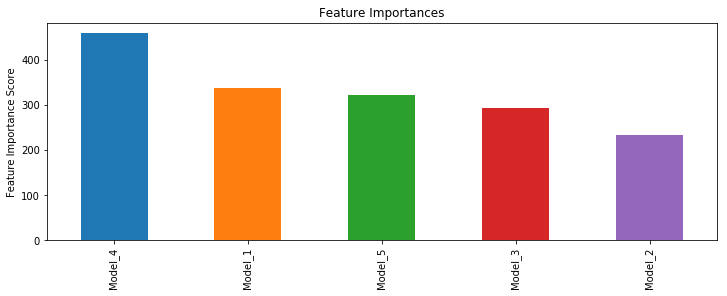

In [323]:
#Prepare the stacked df for light gbm modeling and tuning.

x_train, x_valid, y_train, y_valid = train_test_split(full_stack, full_stack['Classes'], random_state=42, test_size=0.3)

target = 'Classes'

predictors = [x for x in x_train.columns if x not in [target]]

lgbm0 = lgbm.LGBMClassifier(objective = 'binary', random_state = 47)
modelfit(lgbm0, x_train, predictors, target)



In [324]:
prediction = lgbm0.predict(x_valid.drop('Classes', axis = 1))
f1_score(y_valid, prediction)

0.6880811496196112

In [327]:
param_test1 = {'num_leaves':np.arange(2, 20, 1), 'max_depth':np.arange(1, 6, 1)}

predictors = [x for x in x_train.columns if x not in [target]]

gsearch1 = GridSearchCV(estimator = lgbm.LGBMClassifier(objective = 'binary', random_state = 47), 
                        param_grid = param_test1, cv=5, return_train_score=True)
gsearch1.fit(x_train[predictors], x_train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_   

({'mean_fit_time': array([0.05489764, 0.05130382, 0.05569491, 0.04551501, 0.04481635,
         0.04451718, 0.04451709, 0.04820995, 0.04471626, 0.04761105,
         0.04751143, 0.04511561, 0.04431772, 0.04461656, 0.04661317,
         0.04441705, 0.04441714, 0.04661264, 0.04421725, 0.05290155,
         0.05350008, 0.0532002 , 0.05359974, 0.05300088, 0.05370002,
         0.05509691, 0.062783  , 0.05699358, 0.05709352, 0.06747422,
         0.05330024, 0.05409913, 0.05859046, 0.05419893, 0.05879045,
         0.05349984, 0.04421725, 0.05110502, 0.05559573, 0.06088686,
         0.06018786, 0.06348162, 0.06637602, 0.06607699, 0.06497869,
         0.06527791, 0.06727462, 0.07496028, 0.07236533, 0.0657774 ,
         0.06577706, 0.06687565, 0.06527805, 0.06667557, 0.04411783,
         0.05030589, 0.05509696, 0.05839114, 0.0623836 , 0.06527786,
         0.06827254, 0.07545934, 0.09741831, 0.08025055, 0.09462342,
         0.09212775, 0.09542279, 0.08703761, 0.08194747, 0.08144779,
         0.081847


Model Report
Accuracy : 0.9641
AUC Score (Train): 0.842267
CV Score : Mean - 0.8404041 | Std - 0.007773428 | Min - 0.8269227 | Max - 0.8488027


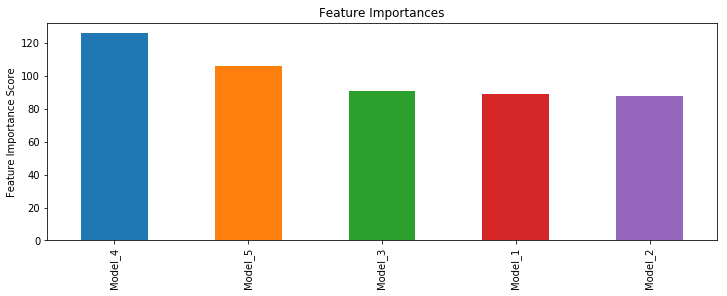

In [328]:

lgbm1 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 3, num_leaves = 6, random_state = 47)
modelfit(lgbm1, x_train, predictors, target)

In [329]:
prediction = lgbm1.predict(x_valid.drop('Classes', axis = 1))
f1_score(y_valid, prediction)

0.6902953586497891

In [331]:
param_test2 = {'min_data_in_leaf':np.arange(2, 15, 1)}
gsearch2 = GridSearchCV(estimator = lgbm.LGBMClassifier(objective = 'binary', random_state = 47, 
                                                        max_depth = 3, num_leaves = 6,), 
                        param_grid = param_test2, cv=5, return_train_score=True)

gsearch2.fit(x_train[predictors], x_train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_   

({'mean_fit_time': array([0.0610858 , 0.06198459, 0.06158571, 0.08404379, 0.06048698,
         0.06018839, 0.06078696, 0.06178522, 0.06028748, 0.06048722,
         0.06008821, 0.06517882, 0.06887112]),
  'std_fit_time': array([0.00298762, 0.00168221, 0.00092563, 0.02515354, 0.00079826,
         0.0007474 , 0.00127821, 0.00198106, 0.00079784, 0.00106561,
         0.00067735, 0.00470914, 0.00154594]),
  'mean_score_time': array([0.00928321, 0.00838408, 0.00968199, 0.01127901, 0.00858459,
         0.00888324, 0.00848455, 0.00958209, 0.00948243, 0.0095819 ,
         0.00948424, 0.01067991, 0.01038094]),
  'std_score_time': array([9.77870698e-04, 5.81940781e-04, 7.47104883e-04, 2.03575212e-03,
         8.58729015e-04, 1.23850284e-03, 1.22216440e-03, 6.62170104e-04,
         3.15526697e-04, 3.73437741e-04, 2.77386466e-06, 8.11141765e-04,
         3.73387287e-04]),
  'param_min_data_in_leaf': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
               mask=[False, False, Fa


Model Report
Accuracy : 0.9641
AUC Score (Train): 0.842266
CV Score : Mean - 0.8420552 | Std - 0.00771634 | Min - 0.829711 | Max - 0.8517053


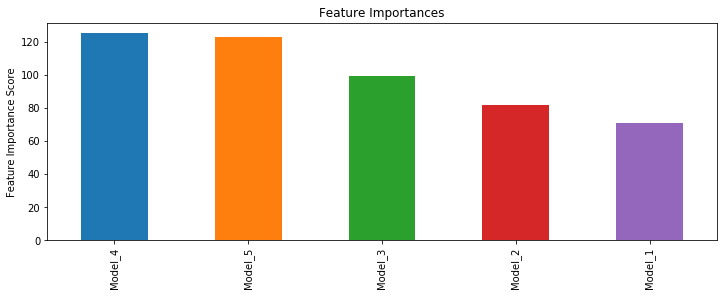

In [332]:
lgbm2 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 3, num_leaves = 6, min_data_in_leaf = 4, random_state = 47)
modelfit(lgbm2, x_train, predictors, target)

In [333]:
prediction = lgbm2.predict(x_valid.drop('Classes', axis = 1))
f1_score(y_valid, prediction)

0.6902953586497891

In [334]:
param_test3 = {'bagging_fraction':np.arange(.2, 1, .1), 'feature_fraction':np.arange(.2, 1, .1)}


gsearch3 = GridSearchCV(estimator = lgbm.LGBMClassifier(objective = 'binary', max_depth = 3, 
                                                        num_leaves = 6, min_data_in_leaf = 4, random_state = 47), 
                        param_grid = param_test3, cv=5, return_train_score=True)
gsearch3.fit(x_train[predictors], x_train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_   

({'mean_fit_time': array([0.06128592, 0.04850984, 0.06577716, 0.05918961, 0.06188464,
         0.06557808, 0.06438041, 0.05988803, 0.04711189, 0.04721231,
         0.05739331, 0.05639505, 0.06028767, 0.06168542, 0.07026896,
         0.06727495, 0.0483099 , 0.04741139, 0.05659437, 0.05779266,
         0.05988808, 0.06028748, 0.06008816, 0.05988812, 0.0482101 ,
         0.04651346, 0.05739279, 0.05779209, 0.06378169, 0.0601882 ,
         0.05998821, 0.06068692, 0.04850984, 0.04691277, 0.06937079,
         0.06428037, 0.07206578, 0.06487927, 0.06298251, 0.06248369,
         0.04870949, 0.04781127, 0.05909019, 0.06038761, 0.06408067,
         0.06348157, 0.06288304, 0.0719655 , 0.05499735, 0.04980741,
         0.0600883 , 0.06048751, 0.06418042, 0.06328254, 0.06348124,
         0.06318226, 0.0513041 , 0.05280118, 0.06358109, 0.05998783,
         0.06497927, 0.0671752 , 0.06398101, 0.06358128]),
  'std_fit_time': array([0.02377449, 0.00106581, 0.01390762, 0.0009256 , 0.00417557,
         0.


Model Report
Accuracy : 0.9641
AUC Score (Train): 0.842254
CV Score : Mean - 0.8420881 | Std - 0.007705102 | Min - 0.8297519 | Max - 0.8517314


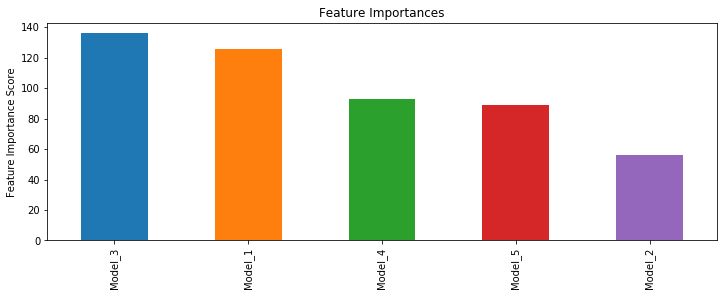

In [335]:
lgbm3 = lgbm.LGBMClassifier(objective = 'binary', max_depth = 3, num_leaves = 6, min_data_in_leaf = 4, 
                            bagging_fraction= 0.2, feature_fraction= 0.6, random_state = 47)
modelfit(lgbm3, x_train, predictors, target)

In [336]:
prediction = lgbm3.predict(x_valid.drop('Classes', axis = 1))
f1_score(y_valid, prediction)

0.6902953586497891

In [344]:
test_pred_3 = lgbm3.predict(test_stack.astype('float32')) 
test['label'] = test_pred_3
submission = test[['id','label']] 
submission.to_csv('stacked_3_Donahue.csv', index=False)

## Remark:
This Classifier was the best performer in the competition thus far, with 73.5% accuracy.

# Train LogReg Model from stacked df

In [345]:
log_y = full_stack['Classes']
log_x = full_stack.drop('Classes', axis = 1)

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression(random_state = 47)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(log_x, log_y)

#Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))



C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.9608597709780364


In [346]:
lr = LogisticRegression(C = 0.439397056070795).fit(log_x, log_y)
test_pred_4 = lr.predict(test_stack) 
test['label'] = test_pred_4 
submission = test[['id','label']] 
submission.to_csv('stacked_4_Donahue.csv', index=False)

C:\Users\taijisteve84\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Remark:

This classifier was the second best, with an accuracy of 70.7%